In [53]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from catboost import CatBoostClassifier

In [2]:
df = pd.read_csv('../data/winequality-red.csv', sep=';')
print(df.shape)
df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [11]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

(array([3., 0., 1., 0., 0., 0., 0., 0., 0., 2.]),
 array([ 10. ,  77.1, 144.2, 211.3, 278.4, 345.5, 412.6, 479.7, 546.8,
        613.9, 681. ]),
 <BarContainer object of 10 artists>)

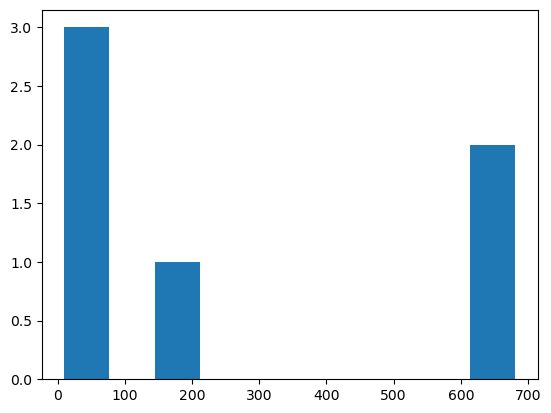

In [13]:
plt.hist(df.quality.value_counts())

In [22]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

In [47]:
model = CatBoostClassifier()
model.fit(X_train, y_train)
y_train_pred = model.predict_proba(X_train)
y_test_pred = model.predict_proba(X_test)

/Users/dmitry/opt/anaconda3/envs/mlops-labs-venv/lib/python3.8/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Learning rate set to 0.080126
0:	learn: 1.6838479	total: 9.43ms	remaining: 9.42s
1:	learn: 1.6008704	total: 15.1ms	remaining: 7.53s
2:	learn: 1.5247721	total: 18.7ms	remaining: 6.2s
3:	learn: 1.4640457	total: 21.8ms	remaining: 5.43s
4:	learn: 1.4064578	total: 25.2ms	remaining: 5.01s
5:	learn: 1.3577893	total: 28.7ms	remaining: 4.75s
6:	learn: 1.3146776	total: 31.7ms	remaining: 4.49s
7:	learn: 1.2752707	total: 34.6ms	remaining: 4.29s
8:	learn: 1.2395627	total: 37.7ms	remaining: 4.15s
9:	learn: 1.2083606	total: 40.6ms	remaining: 4.02s
10:	learn: 1.1805943	total: 43.4ms	remaining: 3.9s
11:	learn: 1.1534600	total: 46.1ms	remaining: 3.79s
12:	learn: 1.1308927	total: 48.7ms	remaining: 3.7s
13:	learn: 1.1078482	total: 51.4ms	remaining: 3.62s
14:	learn: 1.0872237	total: 53.7ms	remaining: 3.53s
15:	learn: 1.0701065	total: 56.1ms	remaining: 3.45s
16:	learn: 1.0546577	total: 58.3ms	remaining: 3.37s
17:	learn: 1.0392191	total: 60.6ms	remaining: 3.3s
18:	learn: 1.0226949	total: 62.7ms	remaining: 3.

208:	learn: 0.5088063	total: 391ms	remaining: 1.48s
209:	learn: 0.5078416	total: 392ms	remaining: 1.48s
210:	learn: 0.5061030	total: 394ms	remaining: 1.47s
211:	learn: 0.5047428	total: 396ms	remaining: 1.47s
212:	learn: 0.5031785	total: 397ms	remaining: 1.47s
213:	learn: 0.5021751	total: 399ms	remaining: 1.47s
214:	learn: 0.5005272	total: 401ms	remaining: 1.46s
215:	learn: 0.4998355	total: 403ms	remaining: 1.46s
216:	learn: 0.4991276	total: 405ms	remaining: 1.46s
217:	learn: 0.4977272	total: 407ms	remaining: 1.46s
218:	learn: 0.4971728	total: 409ms	remaining: 1.46s
219:	learn: 0.4951363	total: 411ms	remaining: 1.46s
220:	learn: 0.4936442	total: 413ms	remaining: 1.45s
221:	learn: 0.4926545	total: 414ms	remaining: 1.45s
222:	learn: 0.4910506	total: 416ms	remaining: 1.45s
223:	learn: 0.4896279	total: 418ms	remaining: 1.45s
224:	learn: 0.4885566	total: 420ms	remaining: 1.45s
225:	learn: 0.4871304	total: 421ms	remaining: 1.44s
226:	learn: 0.4864546	total: 423ms	remaining: 1.44s
227:	learn: 

433:	learn: 0.2962351	total: 785ms	remaining: 1.02s
434:	learn: 0.2955784	total: 787ms	remaining: 1.02s
435:	learn: 0.2946607	total: 789ms	remaining: 1.02s
436:	learn: 0.2940052	total: 790ms	remaining: 1.02s
437:	learn: 0.2931660	total: 792ms	remaining: 1.02s
438:	learn: 0.2928463	total: 794ms	remaining: 1.01s
439:	learn: 0.2919903	total: 796ms	remaining: 1.01s
440:	learn: 0.2915138	total: 797ms	remaining: 1.01s
441:	learn: 0.2912858	total: 799ms	remaining: 1.01s
442:	learn: 0.2906874	total: 801ms	remaining: 1.01s
443:	learn: 0.2902510	total: 804ms	remaining: 1.01s
444:	learn: 0.2895216	total: 806ms	remaining: 1s
445:	learn: 0.2888560	total: 807ms	remaining: 1s
446:	learn: 0.2880602	total: 809ms	remaining: 1s
447:	learn: 0.2871839	total: 811ms	remaining: 999ms
448:	learn: 0.2867536	total: 813ms	remaining: 997ms
449:	learn: 0.2859322	total: 815ms	remaining: 996ms
450:	learn: 0.2853817	total: 816ms	remaining: 994ms
451:	learn: 0.2852073	total: 818ms	remaining: 991ms
452:	learn: 0.2845421

658:	learn: 0.1905875	total: 1.18s	remaining: 610ms
659:	learn: 0.1902438	total: 1.18s	remaining: 608ms
660:	learn: 0.1899700	total: 1.18s	remaining: 607ms
661:	learn: 0.1897465	total: 1.18s	remaining: 605ms
662:	learn: 0.1892551	total: 1.19s	remaining: 603ms
663:	learn: 0.1889107	total: 1.19s	remaining: 601ms
664:	learn: 0.1884258	total: 1.19s	remaining: 600ms
665:	learn: 0.1881257	total: 1.19s	remaining: 598ms
666:	learn: 0.1877876	total: 1.19s	remaining: 596ms
667:	learn: 0.1876099	total: 1.2s	remaining: 594ms
668:	learn: 0.1871536	total: 1.2s	remaining: 593ms
669:	learn: 0.1867771	total: 1.2s	remaining: 591ms
670:	learn: 0.1865415	total: 1.2s	remaining: 589ms
671:	learn: 0.1861350	total: 1.2s	remaining: 587ms
672:	learn: 0.1857735	total: 1.2s	remaining: 585ms
673:	learn: 0.1853238	total: 1.21s	remaining: 584ms
674:	learn: 0.1850208	total: 1.21s	remaining: 582ms
675:	learn: 0.1847953	total: 1.21s	remaining: 580ms
676:	learn: 0.1844654	total: 1.21s	remaining: 578ms
677:	learn: 0.1840

884:	learn: 0.1328829	total: 1.57s	remaining: 204ms
885:	learn: 0.1327097	total: 1.57s	remaining: 203ms
886:	learn: 0.1324726	total: 1.58s	remaining: 201ms
887:	learn: 0.1323428	total: 1.58s	remaining: 199ms
888:	learn: 0.1321655	total: 1.58s	remaining: 197ms
889:	learn: 0.1319000	total: 1.58s	remaining: 196ms
890:	learn: 0.1317354	total: 1.58s	remaining: 194ms
891:	learn: 0.1316417	total: 1.59s	remaining: 192ms
892:	learn: 0.1314298	total: 1.59s	remaining: 190ms
893:	learn: 0.1312413	total: 1.59s	remaining: 189ms
894:	learn: 0.1310804	total: 1.59s	remaining: 187ms
895:	learn: 0.1309044	total: 1.59s	remaining: 185ms
896:	learn: 0.1308117	total: 1.59s	remaining: 183ms
897:	learn: 0.1305837	total: 1.6s	remaining: 181ms
898:	learn: 0.1303967	total: 1.6s	remaining: 180ms
899:	learn: 0.1302216	total: 1.6s	remaining: 178ms
900:	learn: 0.1299809	total: 1.6s	remaining: 176ms
901:	learn: 0.1297875	total: 1.6s	remaining: 174ms
902:	learn: 0.1296521	total: 1.6s	remaining: 172ms
903:	learn: 0.1293

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.74      0.82      0.78       136
           6       0.64      0.69      0.66       128
           7       0.71      0.55      0.62        40
           8       0.00      0.00      0.00         3

    accuracy                           0.69       320
   macro avg       0.35      0.34      0.34       320
weighted avg       0.66      0.69      0.67       320



/Users/dmitry/opt/anaconda3/envs/mlops-labs-venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dmitry/opt/anaconda3/envs/mlops-labs-venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dmitry/opt/anaconda3/envs/mlops-labs-venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [52]:
# train_auc = roc_auc_score(y_train, y_train_pred, multi_class='ovr')
# test_auc = roc_auc_score(y_test, y_test_pred, multi_class='ovr')

# plt.figure(figsize=(20,10))
# plt.plot(*roc_curve(y_train, y_train_pred)[:2], label='train AUC={:.4f}'.format(train_auc))
# plt.plot(*roc_curve(y_test, y_test_pred)[:2], label='test AUC={:.4f}'.format(test_auc))
# legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
# legend_box.set_facecolor("white")
# legend_box.set_edgecolor("black")
# plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
# plt.show()

In [54]:
joblib.dump(model, './model.joblib')

['./model.joblib']